In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [7]:
class Config:
    base_dir = os.path.dirname(os.getcwd())
    data_dir = os.path.join(base_dir, 'dataset')
    image_dir = os.path.join(data_dir, 'images')
    train_file = 'data_train.csv'
    eval_file = 'data_eval.csv'

cfg = Config()

In [11]:
train_df = pd.read_csv(os.path.join(cfg.data_dir, cfg.train_file))
eval_df =  pd.read_csv(os.path.join(cfg.data_dir, cfg.eval_file))
print(f"Train Data Size : {train_df.shape[0]}")
print(f"Eval Data Size : {eval_df.shape[0]}")

Train Data Size : 9974
Eval Data Size : 2494


In [12]:
train_df.head()

question        answer   image_id
0                what is the object on the shelves           cup   image100
1                         how man chairs are there             6   image888
2      what is hanged to the right side of the bed       curtain  image1174
3                 how many picture are on the wall             2   image942
4  what is the object on the floor behind the rack  room_divider  image1220

In [33]:
answer_space = train_df.answer.unique()
print(f"Train Answer Space Size : {answer_space.shape[0]}")

num_images = train_df.image_id.unique().shape[0]
print(f"Total Unique Images : {num_images}")

Train Answer Space Size : 1260
Total Unique Images : 1442


In [17]:
1 in train_df.index

True

In [35]:
# %%writefile ../src/dataset.py
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# import cv2

class VQADataset:
    def __init__(self, cfg, type_='train'):
        assert type_ in ('train', 'eval'), f"Two type_ are supported train and eval"

        if type_ == "train":
            self.data = pd.read_csv(os.path.join(cfg.data_dir, cfg.train_file))
        else:
            self.data = pd.read_csv(os.path.join(cfg.data_dir, cfg.eval_file))

        self.image_dir = cfg.image_dir
        self.image_list = os.listdir(self.image_dir)

        print(f"Dataset Size : {self.data.shape[0]}")

    def fetch_data(self, idx):
        assert idx in self.data.index, f"idx value out of bounds"
        row = self.data.iloc[idx]
        
        ques = row['question']
        ans = row['answer']
        image_id = f"{row['image_id']}.png"

        if image_id not in self.image_list:
            raise ValueError(f"{image_id} not present in image dir")

        image_path = os.path.join(self.image_dir, image_id)
        return {"question" : ques, "answer" : ans, "image_path" : image_path}
        

    def display(self, idx):
        assert idx in self.data.index, f"idx value out of bounds"
        row = self.data.iloc[idx]
        
        ques = row['question']
        ans = row['answer']
        image_id = f"{row['image_id']}.png"

        if image_id not in self.image_list:
            raise ValueError(f"{image_id} not present in image dir")

        image_path = os.path.join(self.image_dir, image_id)
        image = cv2.imread(image_path)

        plt.figure(figsize=(10,20))
        plt.title(f"Question : {ques}\nAnswer : {ans}")
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [36]:
vqa_dataset = VQADataset(cfg=cfg, type_='train')

Dataset Size : 9974


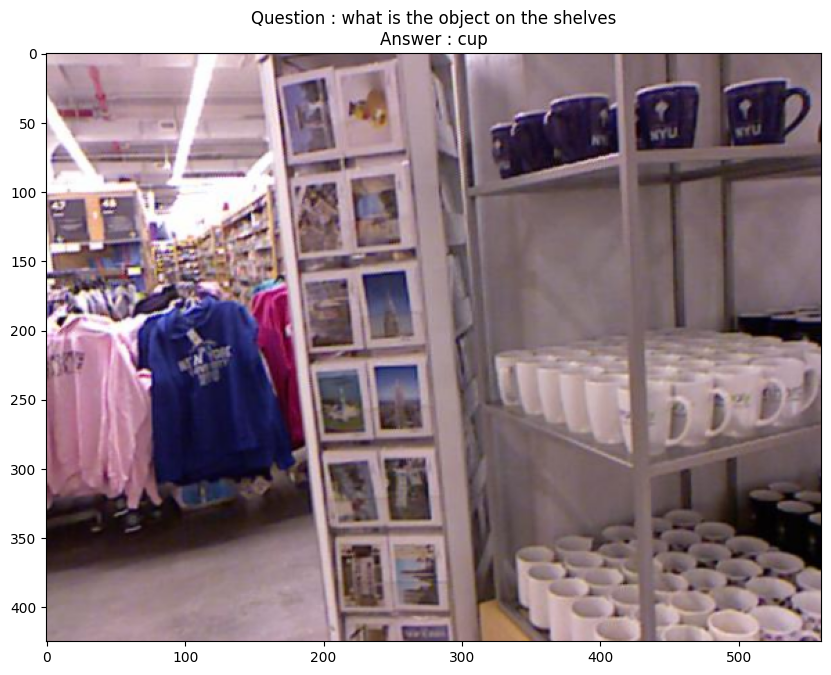

In [37]:
vqa_dataset.display(idx=0)

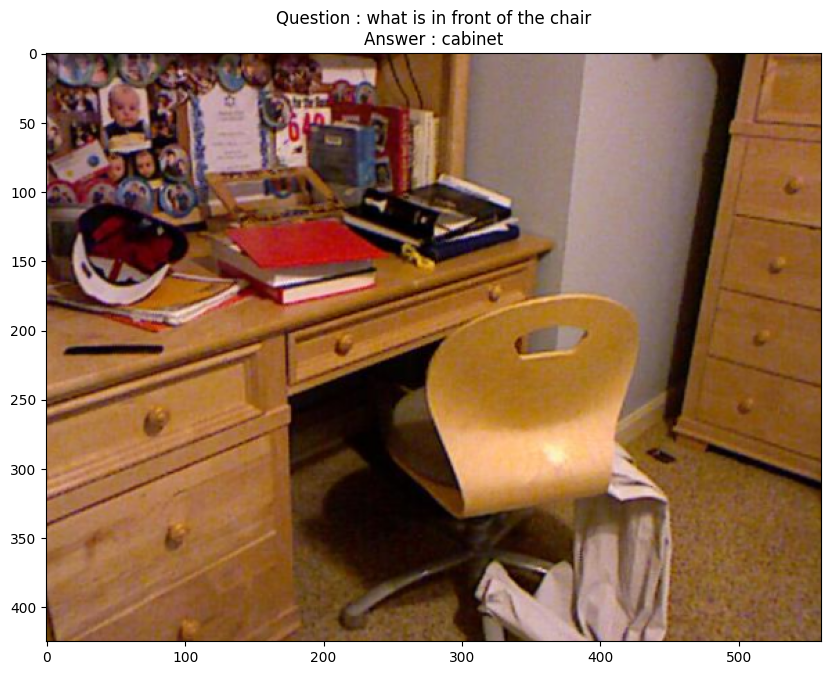

In [28]:
vqa_dataset.display(idx=100)

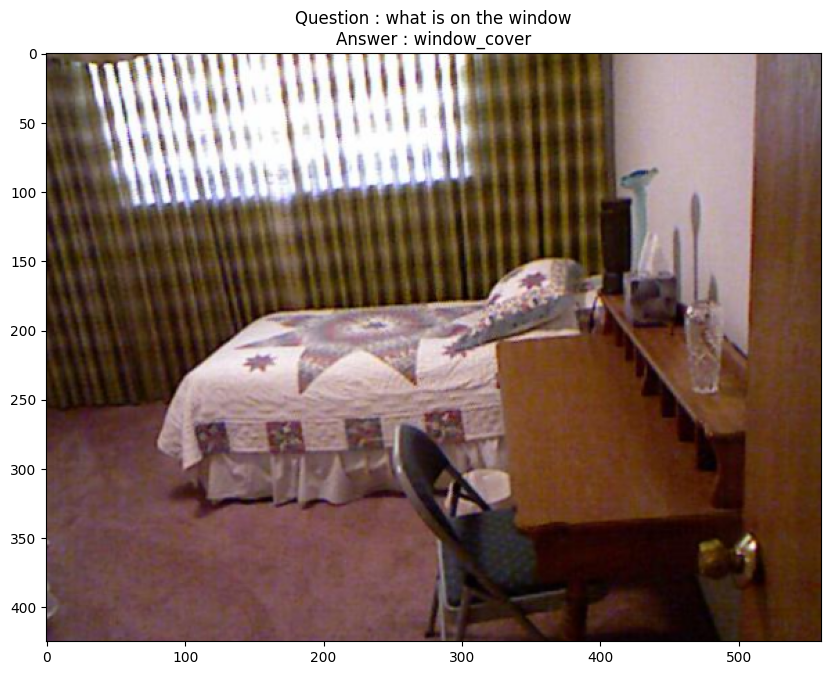

In [29]:
vqa_dataset.display(idx=1000)

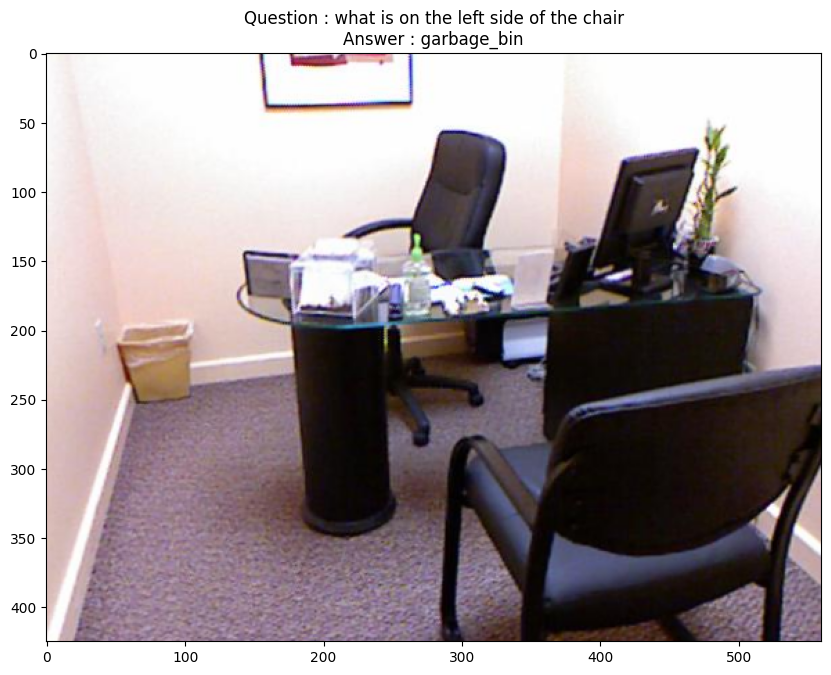

In [30]:
vqa_dataset.display(idx=4300)

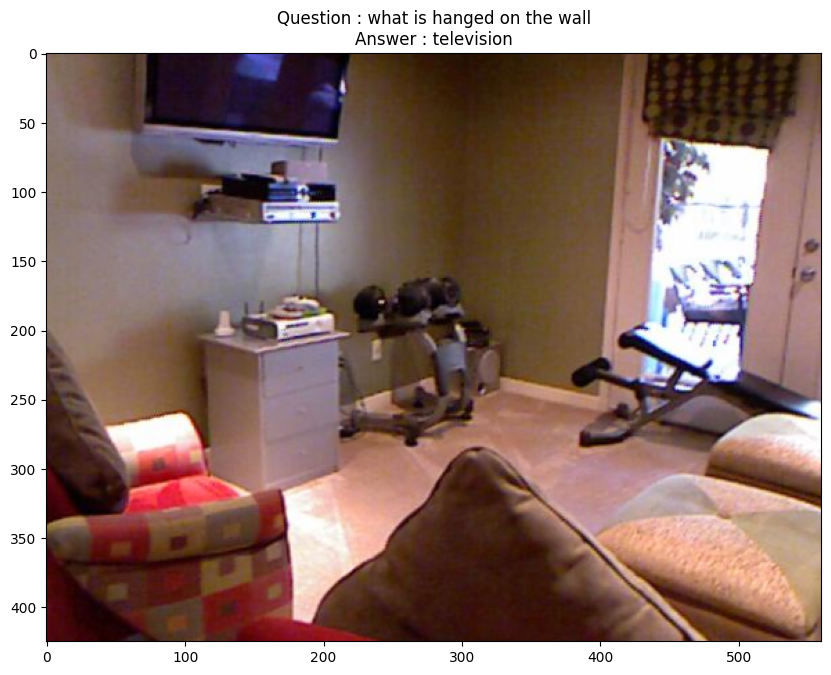

In [32]:
vqa_dataset.display(idx=9211)

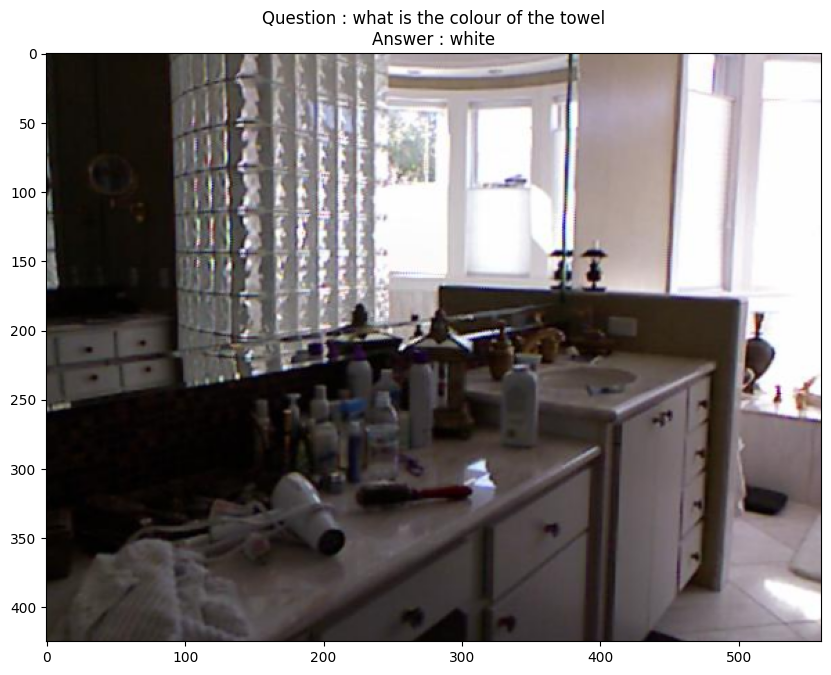

In [38]:
vqa_dataset.display(idx=101)

In [39]:
vqa_dataset.fetch_data(idx=101)

{'question': 'what is the colour of the towel',
 'answer': 'white',
 'image_path': '/nfs/home/scg1143/MLDS/Quarter3/DeepLearning/Project/VQA-ObjectDetection/dataset/images/image720.png'}